# Simple Linear Regression

#### Base purpose of simple linear regression is to find the linear function that indicates the relation between dependent variable and independent variable. 

## Theory

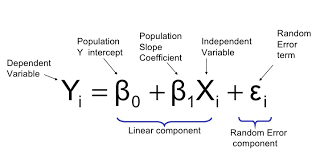

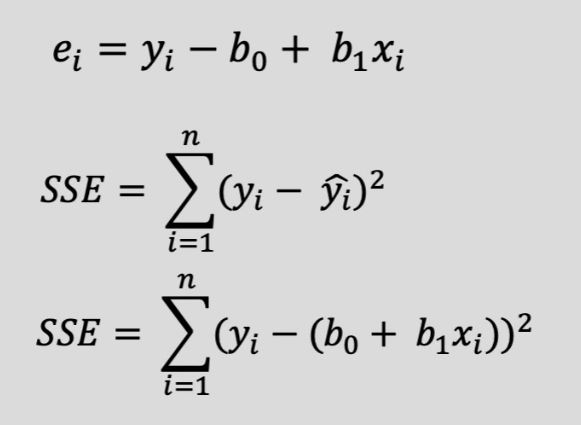

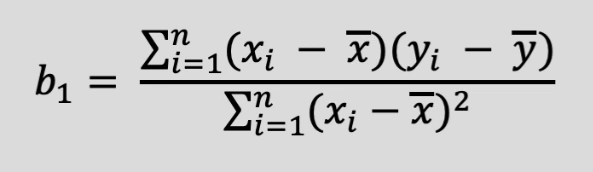

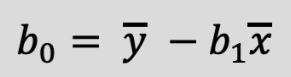

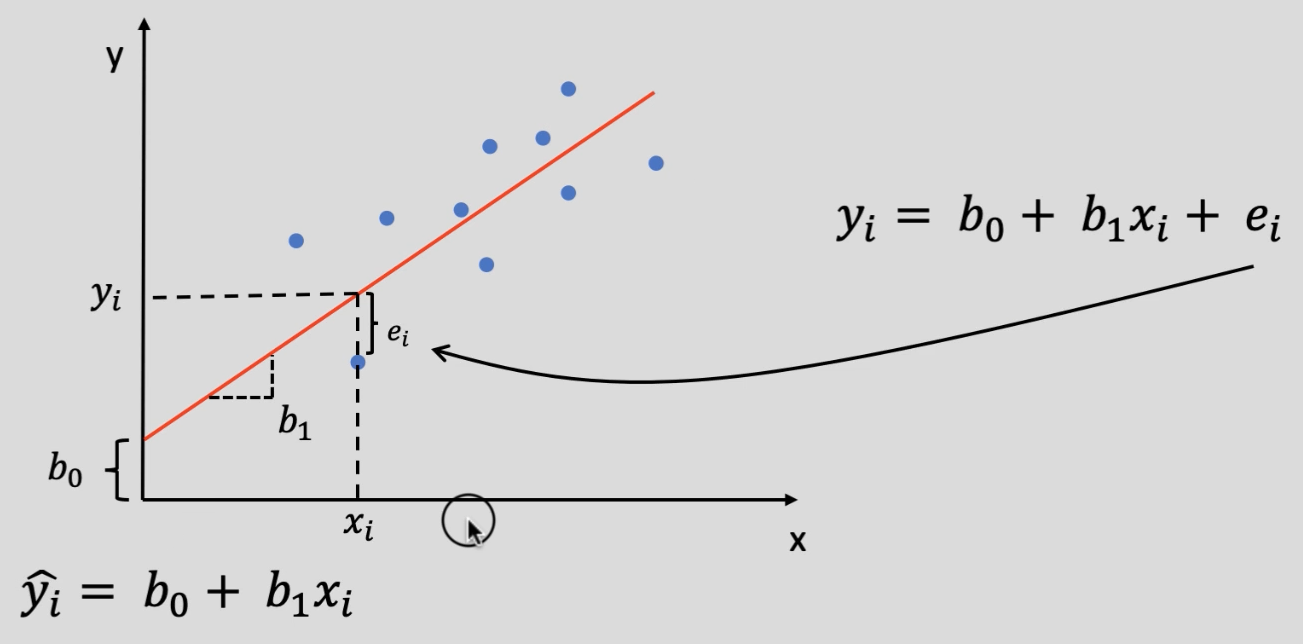

## Model

In [8]:
import pandas as pd
ads = pd.read_csv("../../Datasets/Advertising.csv")
df = ads.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
df = df.iloc[:, 1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [14]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


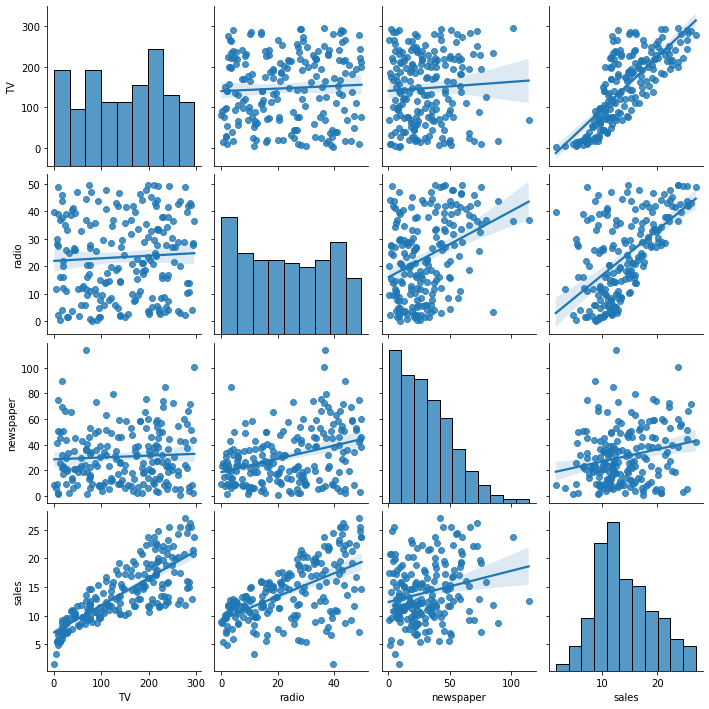

In [18]:
import seaborn as sns
sns.pairplot(df, kind = "reg");

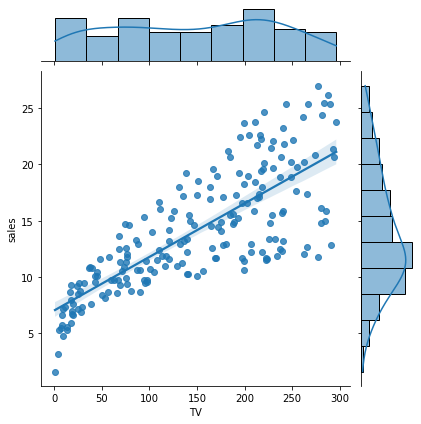

In [20]:
sns.jointplot(x="TV", y="sales", data = df, kind="reg");

### Modelling with Statsmodels

In [22]:
import statsmodels.api as sm

In [23]:
X = df[["TV"]]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [27]:
X = sm.add_constant(X)
X.head()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [28]:
y = df[["sales"]]

In [33]:
lm = sm.OLS(y, X)
model = lm.fit()

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           1.47e-42
Time:                        20:31:30   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           1.47e-42
Time:                        20:43:08   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [47]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [48]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [49]:
model.f_pvalue

1.467389700194647e-42

In [51]:
model.fvalue

312.144994372713

In [55]:
model.tvalues

Intercept    15.360275
TV           17.667626
dtype: float64

In [56]:
model.mse_model

3314.618166868649

In [58]:
model.rsquared

0.611875050850071

In [59]:
model.rsquared_adj

0.6099148238341623

In [60]:
model.fittedvalues[:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [61]:
y[:5]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


		Sales = 7.033 + TV*0.048


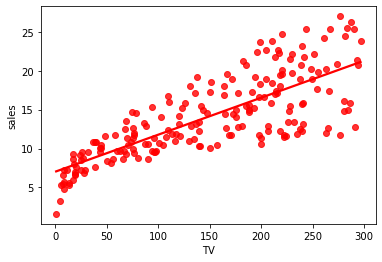

In [74]:
print(f"\t\tSales = {model.params[0]:.3f} + TV*{model.params[1]:.3f}")

sns.regplot(x="TV", y="sales", ci=None, data=df, color="red");

In [75]:
from sklearn.linear_model import LinearRegression

In [85]:
X = df[["TV"]]
y = df[["sales"]]
reg = LinearRegression()
model = reg.fit(X, y)
print(model.intercept_)
print(model.coef_)

[7.03259355]
[[0.04753664]]


In [86]:
model.score(X, y)

0.611875050850071

In [90]:
model.predict(X)[:5]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814]])

## Prediction

In [94]:
model.predict([[30]])

array([[8.45869276]])

In [95]:
test_values = [[5], [90], [200]]

In [96]:
model.predict(test_values)

array([[ 7.27027675],
       [11.31089119],
       [16.53992164]])